In [0]:
import random
import numpy as np
import matplotlib.pyplot as plt
from random import shuffle

def game():
  deck = deck_numerical()
  shuffled_deck = shuffled(deck)
  z = []

  while len(shuffled_deck) > 20:
    
    player_card1 = card(shuffled_deck)
    bank_card1 = card(shuffled_deck)
    player_card2 = card(shuffled_deck)
    bank_card2 = card(shuffled_deck)
    
    player_two_cards = two_cards(player_card1, player_card2)
    bank_two_cards = two_cards(bank_card1, bank_card2)

    x = tableau(player_two_cards, bank_two_cards, shuffled_deck)
    
    z.append(x)
      
  return z

  


In [0]:
def deck_numerical():
    
    deck = []
    
    
    for i in range(1,10):
        deck.append(i)
        deck.append(i)
        deck.append(i)
        deck.append(i)
    
    x = 10
    for i in range(16):
        deck.append(x)
    
    return deck
  

In [0]:

def shuffled(d):

    eight_decks = []

    eight_decks = d*8

    random.shuffle(eight_decks)

    return eight_decks


In [0]:
def card(shuffled_deck):

  card = shuffled_deck.pop()
  if card == 10:
    card = 0

  return card


In [0]:
def two_cards(card1, card2):
    
    total = card1 + card2
    if total >= 10:
      total = total - 10
    
    return total


In [0]:
def cards_result(p, b):
  
  if p >= 10:
    p = p - 10
  if b >= 10:
    b = b - 10

  if p > b:
    result = 1
  if p < b:
    result = -1
  elif p == b:
    result = 0
  
  
  return result

In [0]:
def tableau(p, b, s):
    
    #Natural
     # Natural
    if p in (8, 9) or b in(8, 9):
     
      return cards_result(p, b)
      

    # Player Six - Seven
    elif p in (7, 6) and b in (7,6):
      return cards_result(p, b)
    elif p in (7, 6) and b in (5,4,3,2,1,0):
      bank_3_cards = b + card(s)
      if bank_3_cards >= 10:
        bank_3_cards = bank_3_cards - 10
        return cards_result(p, bank_3_cards)
      else :
        return cards_result(p, bank_3_cards)
      
    # Player 0 - 5
    elif p <= 5:
      player_3_cards = p + card(s)
       
      if b == 7:
        
        return cards_result(player_3_cards, b)
      
      elif b in (0,1,2):
        bank_3_cards = b + card(s)
        
        return cards_result(player_3_cards, bank_3_cards)
      
      elif b == 3:
        if player_3_cards != 8:
          bank_3_cards = b + card(s)
          
          return cards_result(player_3_cards, bank_3_cards)
        else :
          
          return cards_result(player_3_cards, b)
      
      elif b == 4:
        if player_3_cards in (2,3,4,5,6,7):
          bank_3_cards = b + card(s)
          
          return cards_result(player_3_cards, bank_3_cards)
        else :
          
          return cards_result(player_3_cards, b)
     
      elif b == 5:
        if player_3_cards in (4,5,6,7):
          bank_3_cards = b + card(s)
          
          return cards_result(player_3_cards, bank_3_cards)
        else :
          
          return cards_result(player_3_cards, b)
     
      elif b == 6:
        if player_3_cards in (6,7):
          bank_3_cards = b + card(s)
          
          return cards_result(player_3_cards, bank_3_cards)
        else :
          
          return cards_result(player_3_cards, b)

      
          

    

In [0]:
def sampling(n):
  
  total_player = []
  total_banker = []
  total_tie = []
  
  for i in range(n):
    
    y = game()
    p = y.count(1)
    b = y.count(-1)
    t = y.count(0)

    total_player.append(p)
    total_banker.append(b)
    total_tie.append(t)

  return (total_player, total_banker, total_tie)

In [45]:
a = sampling(10000)



([35, 30, 34, 42, 37, 35, 36, 34, 28, 37, 42, 33, 36, 46, 36, 36, 39, 43, 42, 39, 42, 43, 37, 35, 33, 36, 32, 37, 35, 37, 38, 37, 29, 38, 37, 33, 28, 28, 39, 35, 39, 32, 45, 34, 39, 41, 39, 44, 30, 38, 29, 35, 26, 35, 34, 34, 38, 39, 40, 43, 34, 38, 41, 44, 31, 36, 32, 33, 44, 32, 37, 36, 39, 40, 41, 34, 30, 29, 31, 37, 45, 37, 35, 40, 32, 32, 35, 35, 40, 36, 43, 31, 40, 30, 43, 34, 25, 44, 43, 37, 39, 44, 38, 39, 29, 36, 32, 31, 33, 34, 47, 33, 31, 39, 42, 32, 34, 38, 37, 42, 34, 41, 39, 35, 41, 37, 38, 37, 36, 33, 38, 38, 32, 35, 42, 32, 39, 32, 39, 41, 38, 41, 34, 31, 31, 41, 33, 33, 36, 41, 32, 39, 31, 35, 34, 41, 28, 30, 28, 41, 40, 41, 32, 33, 35, 44, 35, 38, 36, 33, 45, 34, 33, 44, 40, 36, 30, 34, 33, 38, 40, 41, 41, 35, 37, 27, 31, 39, 38, 29, 36, 41, 34, 37, 43, 32, 45, 36, 32, 37, 43, 40, 41, 41, 39, 41, 39, 38, 37, 30, 47, 29, 35, 36, 41, 42, 37, 31, 30, 30, 30, 33, 31, 38, 30, 40, 36, 36, 35, 41, 37, 34, 32, 34, 38, 38, 39, 38, 29, 39, 34, 34, 33, 37, 38, 37, 42, 39, 39, 33

([array([   9.,  123.,  813., 2389., 3440., 2299.,  786.,  135.,    6.,
            0.]),
  array([5.000e+00, 7.400e+01, 6.700e+02, 2.075e+03, 3.407e+03, 2.635e+03,
         9.500e+02, 1.670e+02, 1.500e+01, 2.000e+00])],
 array([19. , 22.9, 26.8, 30.7, 34.6, 38.5, 42.4, 46.3, 50.2, 54.1, 58. ]),
 <a list of 2 Lists of Patches objects>)

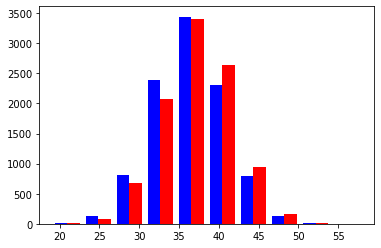

In [49]:
colors = ['blue', 'red']
plt.hist(a[0:2], bins = 10, color = colors)

From this plot it can be seen that Banker has greater frequencies in winning. (after 40). Where as, players usually has the lower frequencies. The first half (less than 40). The game is in favour of Banker.